In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_temp = pd.read_csv('/content/drive/MyDrive/CSV/registro_temperatura365d_smn.csv')


In [ ]:
data_temp.shape

(43679, 4)

In [ ]:
data_temp.head(100)

,FECHA,TMAX,TMIN,NOMBRE
0,29-10-23,23.0,17.9,AEROPARQUE AERO
1,29-10-23,22.9,14.2,AZUL AERO
2,29-10-23,22.1,8.1,BAHIA BLANCA AERO
3,29-10-23,3.5,-0.3,BARILOCHE AERO
4,29-10-23,-4.7,-11.6,BASE BELGRANO II
...,...,...,...,...
95,29-10-23,31.0,16.1,SAN RAFAEL AERO
96,29-10-23,8.3,1.6,SANTA CRUZ AERO
97,29-10-23,25.4,10.9,SANTA ROSA AERO
98,29-10-23,35.1,NaN,SANTA ROSA DE CONLARA AERO


In [ ]:
data_temp.describe()

,TMAX,TMIN
count,41307.000000,42116.000000
mean,22.998235,10.250589
std,10.125030,8.453582
min,-27.600000,-37.600000
25%,17.200000,4.800000
50%,24.000000,11.000000
75%,30.500000,16.800000
max,46.500000,30.000000


In [ ]:
temperatura_cipolletti = data_temp[data_temp["NOMBRE"] == "CIPOLLETTI"]


In [ ]:
temperatura_cipolletti = temperatura_cipolletti.copy()

temperatura_cipolletti['PROMEDIO'] = (temperatura_cipolletti['TMAX'] + temperatura_cipolletti['TMIN']) / 2

In [ ]:
for columna in temperatura_cipolletti.columns:
    print(f'columna: {columna}: los valores únicos son: {temperatura_cipolletti[columna].unique()}')

columna: FECHA: los valores únicos son: ['29-10-23' '28-10-23' '27-10-23' '26-10-23' '25-10-23' '24-10-23'
 '23-10-23' '22-10-23' '21-10-23' '20-10-23' '19-10-23' '18-10-23'
 '17-10-23' '16-10-23' '15-10-23' '14-10-23' '13-10-23' '12-10-23'
 '11-10-23' '10-10-23' '9-10-23' '8-10-23' '7-10-23' '6-10-23' '5-10-23'
 '4-10-23' '3-10-23' '2-10-23' '1-10-23' '30-9-23' '29-9-23' '28-9-23'
 '27-9-23' '26-9-23' '25-9-23' '24-9-23' '23-9-23' '22-9-23' '21-9-23'
 '20-9-23' '19-9-23' '18-9-23' '17-9-23' '16-9-23' '15-9-23' '14-9-23'
 '13-9-23' '12-9-23' '11-9-23' '10-9-23' '9-9-23' '8-9-23' '7-9-23'
 '6-9-23' '5-9-23' '4-9-23' '3-9-23' '2-9-23' '1-9-23' '31-8-23' '30-8-23'
 '29-8-23' '28-8-23' '27-8-23' '26-8-23' '25-8-23' '24-8-23' '23-8-23'
 '22-8-23' '21-8-23' '20-8-23' '19-8-23' '18-8-23' '17-8-23' '16-8-23'
 '15-8-23' '14-8-23' '13-8-23' '12-8-23' '11-8-23' '10-8-23' '9-8-23'
 '8-8-23' '7-8-23' '6-8-23' '5-8-23' '4-8-23' '3-8-23' '2-8-23' '1-8-23'
 '31-7-23' '30-7-23' '29-7-23' '28-7-23' '27-

In [ ]:
# Detectar datos nulos
nul=temperatura_cipolletti.isnull().sum()
print('los nulos son',nul)

los nulos son FECHA       0
TMAX        0
TMIN        0
NOMBRE      0
PROMEDIO    0
dtype: int64


In [ ]:
# Calcular la media por producto
tmax_media = temperatura_cipolletti['TMAX'].mean()

# Reemplazar el valor nulo en la columna 'TMAX' con la media
temperatura_cipolletti['TMAX'].fillna(tmax_media, inplace=True)

#Volver a calcular el promedio para reemplazar el nulo de la columna 'PROMEDIO'

temperatura_cipolletti['PROMEDIO'] = (temperatura_cipolletti['TMAX'] + temperatura_cipolletti['TMIN']) / 2

In [ ]:
print(temperatura_cipolletti.columns)


Index(['FECHA', 'TMAX', 'TMIN', 'NOMBRE', 'PROMEDIO'], dtype='object')


In [ ]:
temperatura_cipolletti['FECHA'] = pd.to_datetime(temperatura_cipolletti['FECHA'], format='%d-%m-%y')


In [ ]:
temperatura_cipolletti.head()

,FECHA,TMAX,TMIN,NOMBRE,PROMEDIO
21,2023-10-29,19.4,8.7,CIPOLLETTI,14.05
140,2023-10-28,23.6,16.0,CIPOLLETTI,19.80
259,2023-10-27,24.0,13.2,CIPOLLETTI,18.60
378,2023-10-26,27.5,10.5,CIPOLLETTI,19.00
497,2023-10-25,27.0,7.6,CIPOLLETTI,17.30


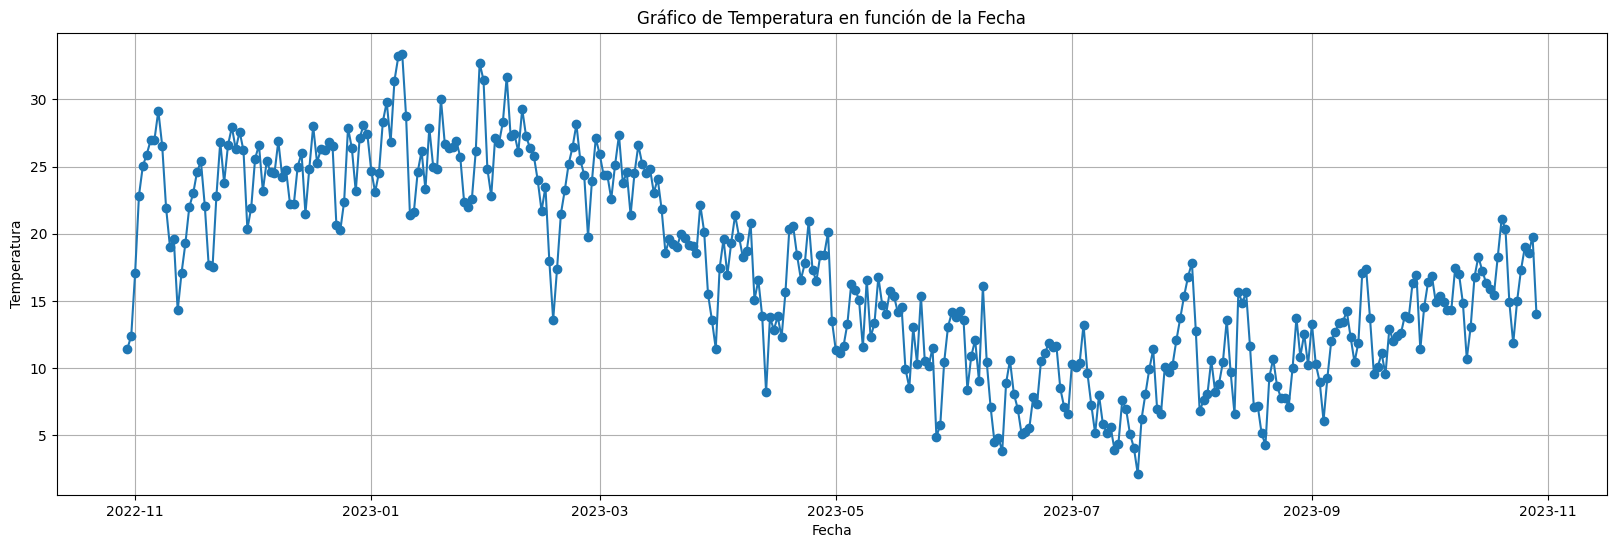

In [ ]:
# Graficar temperatura promedio por fecha

plt.figure(figsize=(20, 6))
plt.plot(temperatura_cipolletti['FECHA'], temperatura_cipolletti['PROMEDIO'], marker='o', linestyle='-')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.title('Gráfico de Temperatura en función de la Fecha')
plt.grid(True)
plt.show()


Se advierte que la temperatura es creciente entre los meses 08 al 01 ambos inclusive, que coincide con la temporada de primavera/verano

In [ ]:
# establecer promedio mensual de temperatura
promedio_temp = temperatura_cipolletti.groupby(temperatura_cipolletti['FECHA'].dt.month).mean(numeric_only=True)


In [ ]:
# Filtra y guarda los datos del mes 9 en una variable llamada 'temperatura_mes9' esto fue una prueba por un error NO VA
temperatura_mes9 = temperatura_cipolletti.groupby(temperatura_cipolletti['FECHA'].dt.month).get_group(9)
print(temperatura_mes9)

          FECHA       TMAX  TMIN      NOMBRE   PROMEDIO
3471 2023-09-30  24.300000   4.8  CIPOLLETTI  14.550000
3590 2023-09-29  19.000000   3.8  CIPOLLETTI  11.400000
3709 2023-09-28  24.211538   9.7  CIPOLLETTI  16.955769
3828 2023-09-27  25.000000   7.7  CIPOLLETTI  16.350000
3947 2023-09-26  19.300000   8.2  CIPOLLETTI  13.750000
4066 2023-09-25  21.000000   6.8  CIPOLLETTI  13.900000
4185 2023-09-24  21.500000   3.7  CIPOLLETTI  12.600000
4304 2023-09-23  21.000000   3.8  CIPOLLETTI  12.400000
4423 2023-09-22  16.700000   7.3  CIPOLLETTI  12.000000
4542 2023-09-21  19.200000   6.7  CIPOLLETTI  12.950000
4661 2023-09-20  13.400000   5.7  CIPOLLETTI   9.550000
4780 2023-09-19  16.900000   5.3  CIPOLLETTI  11.100000
4899 2023-09-18  17.700000   2.5  CIPOLLETTI  10.100000
5018 2023-09-17  14.600000   4.6  CIPOLLETTI   9.600000
5137 2023-09-16  19.900000   7.6  CIPOLLETTI  13.750000
5256 2023-09-15  23.500000  11.3  CIPOLLETTI  17.400000
5375 2023-09-14  24.000000  10.2  CIPOLLETTI  17

In [ ]:
print(promedio_temp)

            TMAX       TMIN   PROMEDIO
FECHA                                 
1      34.732258  18.370968  26.551613
2      33.592857  15.671429  24.632143
3      29.574194  13.658065  21.616129
4      24.243333   9.986667  17.115000
5      19.780645   5.496774  12.638710
6      14.076667   4.153333   9.115000
7      13.900000   3.029032   8.464516
8      15.867742   4.235484  10.051613
9      18.837051   6.090000  12.463526
10     23.093548   8.796774  15.945161
11     30.460000  15.710000  23.085000
12     32.990323  16.822581  24.906452


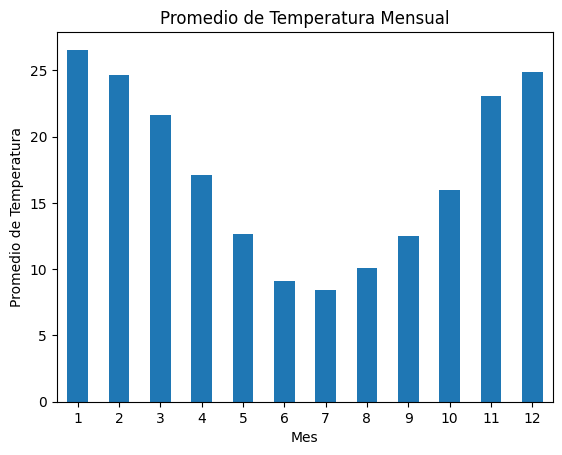

In [ ]:
# Graficar temperatura promedio por mes

promedio_temp.plot(kind='bar', y='PROMEDIO', legend=False)
plt.xlabel('Mes')
plt.ylabel('Promedio de Temperatura')
plt.title('Promedio de Temperatura Mensual')
plt.xticks(rotation=0)  # Evita la rotación de los nombres de los meses en el eje X
plt.show()



In [ ]:
temperatura_cipolletti.head()

,FECHA,TMAX,TMIN,NOMBRE,PROMEDIO
21,2023-10-29,19.4,8.7,CIPOLLETTI,14.05
140,2023-10-28,23.6,16.0,CIPOLLETTI,19.80
259,2023-10-27,24.0,13.2,CIPOLLETTI,18.60
378,2023-10-26,27.5,10.5,CIPOLLETTI,19.00
497,2023-10-25,27.0,7.6,CIPOLLETTI,17.30


In [ ]:
# Establecer el periodo de temperatura creciente con código ESTO NO ES NECESARIO SE HACE CON LA FUNCIÓN LINEAL

# Calcula la diferencia entre los valores de temperatura promedio consecutivos
promedio_temp['DIFERENCIA'] = promedio_temp['PROMEDIO'].diff()

# Calcula la diferencia entre el primer mes y el último mes
primero = promedio_temp['PROMEDIO'].iloc[0]
ultimo = promedio_temp['PROMEDIO'].iloc[-1]
promedio_temp.at[0, 'DIFERENCIA'] = primero - ultimo

# Restablecer el índice del DataFrame
promedio_temp = promedio_temp.reset_index()

# Encontrar los índices donde la diferencia es positiva (crecimiento)
indices_crecientes = promedio_temp[promedio_temp['DIFERENCIA'] > 0].index
periodo_creciente = promedio_temp['FECHA'].loc[indices_crecientes]

# Imprime el período creciente
print(periodo_creciente)




7      8
8      9
9     10
10    11
11    12
Name: FECHA, dtype: int64


In [ ]:
# Agregar al df una columna con el promedio de temperatura mensual para calcular el precio del helado sin tener en cuenta la variación diaria de temperatura
temperatura_cipolletti = temperatura_cipolletti.copy()
promedio_dict = promedio_temp['PROMEDIO'].to_dict()
temperatura_cipolletti['PROMEDIO_MENSUAL'] = temperatura_cipolletti['FECHA'].dt.month.map(promedio_dict)

In [ ]:
print(promedio_dict)

{0: 26.551612903225806, 1: 24.63214285714286, 2: 21.616129032258065, 3: 17.115000000000002, 4: 12.638709677419355, 5: 9.115, 6: 8.464516129032257, 7: 10.051612903225807, 8: 12.463525641025642, 9: 15.94516129032258, 10: 23.084999999999997, 11: 24.906451612903226, 12: nan}


In [ ]:
# Agregar columna con el precio del helado relacionado a la temperatura
n_datos = len(temperatura_cipolletti)
precio_base = 2000
pendiente = 200
diferencia_aleatoria = np.random.randint(-20, 20, n_datos)
np.random.seed(42)

# calcular precio helado con función lineal + diferencia aleatoria
temperatura_cipolletti['PRECIO_HELADO'] = temperatura_cipolletti['PROMEDIO_MENSUAL'] * pendiente + precio_base + diferencia_aleatoria


In [ ]:
# Generar columna compro o no compro
# Calcular el precio límite
precio_minimo = temperatura_cipolletti['PRECIO_HELADO'].min()
precio_limite = precio_minimo + (precio_minimo * 0.40)  # Aumento del 40%

# Definir una función lambda para determinar si se compra o no
temperatura_cipolletti['COMPRO'] = temperatura_cipolletti['PRECIO_HELADO'].apply(lambda precio: 1 if precio <= precio_limite else 0)

# Seleccionar aleatoriamente el 20% de las filas y modificar su valor
filas_a_modificar = temperatura_cipolletti.sample(frac=0.20)
for index, row in filas_a_modificar.iterrows():
    temperatura_cipolletti.at[index, 'COMPRO'] = 1 - row['COMPRO']


In [ ]:
temperatura_cipolletti.describe()
conteo_compra = (temperatura_cipolletti['COMPRO'] == 1).sum()
print(conteo_compra)

172


PERCEPTRON

In [ ]:
# Por las dudas, librerías

import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [ ]:
temperatura_cipolletti.columns

Index(['FECHA', 'TMAX', 'TMIN', 'NOMBRE', 'PROMEDIO', 'PROMEDIO_MENSUAL',
       'PRECIO_HELADO', 'COMPRO'],
      dtype='object')

In [ ]:
X = temperatura_cipolletti[['PROMEDIO', 'PRECIO_HELADO']]
Y = temperatura_cipolletti['COMPRO']
X = X.to_numpy()
Y = Y.to_numpy()


In [ ]:
# dividir entre testeo y entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

PERCEPTRÓN MANUAL

In [ ]:
def perceptron_temperatura(temperatura, umbral_temperatura):
    # Perceptrón para temperatura
    if temperatura > umbral_temperatura:
        return 1  # Compra
    else:
        return 0  # No compra

def perceptron_precio(precio, umbral_precio):
    # Perceptrón para precio del helado
    if precio < umbral_precio:
        return 1  # Compra
    else:
        return 0  # No compra

def decision_compra(temperatura, precio, umbral_temperatura, umbral_precio):
    # Combinar los resultados de los perceptrones usando "o" inclusiva
    resultado_temperatura = perceptron_temperatura(temperatura, umbral_temperatura)
    resultado_precio = perceptron_precio(precio, umbral_precio)

    if resultado_temperatura == 1 or resultado_precio == 1:
        return 1  # Compra
    else:
        return 0  # No compra




In [ ]:
# Ejemplo de uso
temperatura = 28  # Ejemplo de temperatura
precio = 9100  # Ejemplo de precio del helado
umbral_temperatura = 27  # Umbral de temperatura
umbral_precio = (precio_minimo * 40 / 100) + precio_minimo  # Umbral de precio

decision = decision_compra(temperatura, precio, umbral_temperatura, umbral_precio)
print("¿Compra el helado?", "Sí" if decision == 1 else "No")

¿Compra el helado? Sí


# CON KERAS

Se aclara que se hace con keras por haber sido así solicitado, sin perjuicio de lo cual no se ha explicado cómo utilizarlo con condicionales (temperatura y precio)

Igualmente se incorpora el código que no compila en el entrenamiento porque hay que definir una función de pérdida que no se nos ha explicado

In [ ]:
# tenemos una entrada con dos valores: temperatura y precio del helado
# tenemos dos salidas: compro o no compro helado

# Definir una función personalizada para aplicar una condición a las salidas
def apply_condition(x):
    # x[0] es la salida relacionada con la temperatura, y x[1] es la salida relacionada con el precio
    temperatura_output = x[0]
    precio_output = x[1]

    # Establecer umbrales para temperatura y precio
    umbral_temperatura = 27
    umbral_precio = (precio_minimo * 40 / 100) + precio_minimo

    # Realizar comparaciones utilizando funciones de TensorFlow
    temperatura_superior_al_umbral = tf.greater(temperatura_output, umbral_temperatura)
    precio_superior_al_umbral = tf.greater(precio_output, umbral_precio)

    # Aplicar condiciones basadas en las comparaciones
    comprar_helado = tf.logical_or(temperatura_superior_al_umbral, precio_superior_al_umbral)

    return tf.where(comprar_helado, [1.0, 0.0], [0.0, 1.0])  # Compra helado si se cumple la condición


# Crear el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(10, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='sigmoid'),
    tf.keras.layers.Dense(2, activation='linear')  # Usar activación lineal en la capa de salida
])

# Aplicar la función personalizada como última capa para aplicar la condición
model.add(tf.keras.layers.Lambda(apply_condition))



# Compilar el modelo
model.compile(loss='binary_accuracy', optimizer='adam', metrics=['accuracy'])

# Resumen del modelo
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                30        
                                                                 
 dense_22 (Dense)            (None, 5)                 55        
                                                                 
 dense_23 (Dense)            (None, 2)                 12        
                                                                 
 lambda_7 (Lambda)           (2,)                      0         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
def custom_loss(y_true, y_pred):
    # Convertir y_true y y_pred a float32
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    # Definir pesos para las clases (compra correcta e incorrecta)
    weights = np.random.uniform(0.1, 1.0, size=(2,))

    # Aplicar entropía cruzada ponderada
    loss = tf.nn.weighted_cross_entropy_with_logits(y_true, y_pred, pos_weight=weights)

    return loss

# Luego, configura la función de pérdida personalizada en model.compile
model.compile(loss=custom_loss, optimizer='adam', metrics=['accuracy'])


In [ ]:
# entrenar modelo
model.fit(X_train, Y_train, epochs = 10, batch_size=32, validation_split= 0.2)

In [ ]:
# probar esta solución

import tensorflow as tf

# Definir una función que toma las salidas del modelo y aplica la condición
def custom_activation(x):
    # x es la salida del modelo
    temperatura_output = x[:, 0]
    precio_output = x[:, 1]

    # Establecer umbrales para temperatura y precio
    umbral_temperatura = 27
    umbral_precio = (precio_minimo * 40 / 100) + precio_minimo

    # Aplicar condiciones basadas en temperatura y precio
    condicion_compra = tf.where(tf.logical_or(temperatura_output > umbral_temperatura, precio_output > umbral_precio), 1.0, 0.0)

    # Crear un tensor de salida con las condiciones aplicadas
    return tf.stack([condicion_compra, 1.0 - condicion_compra], axis=-1)

# Crear el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(10, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='sigmoid'),
    tf.keras.layers.Dense(2, activation=custom_activation)  # Usar la función de activación condicional
])

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
